In [70]:
import rasterio
import numpy as np
import pandas as pd
import cv2
from catboost import CatBoostClassifier

from Nesterov_koef import CFD
from api import call_api

In [71]:
model = CatBoostClassifier()
model = model.load_model('fire_falcon_easy')

In [84]:
def transform(img_path):
    with rasterio.open(img_path) as src:
        red = src.read(1)  # B02 - Blue
        green = src.read(2)  # B03 - Green
        blue = src.read(3)  # B04 - Red
        ik = src.read(4)

        img = np.stack([red, green, blue, ik], axis=-1)

        img = cv2.resize(img, (135, 106))
        
        img = img.reshape([135 * 106, 4])

        return img
    
def get_coords(img_path):
    with rasterio.open(img_path) as src:
        return [src.bounds.top, src.bounds.left]
    
def get_time(img_path):
     return img_path[4:-5]

def get_size(img_path):
    with rasterio.open(img_path) as src:
        return [src.width, src.height]

def get_prediction(tiff_path):
    image = transform(tiff_path)
    predict = model.predict(image)
    predict = predict.reshape([106,135,1])

    size = get_size(tiff_path)
    #return_image = cv2.resize(predict, size)
    return predict#return_image

In [85]:
im = transform("Testing//test.tiff")
pred = get_prediction("Testing//test.tiff")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


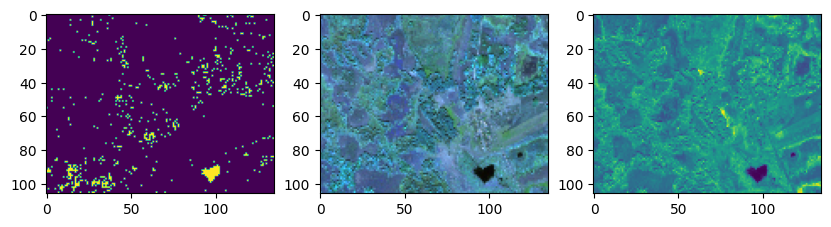

In [86]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

to_draw = im.reshape([106,135,4])

#pred = pred.reshape([106, 135,1])

axs[2].imshow(to_draw[:,:,3])
axs[1].imshow(to_draw[:,:,:3]/255*8)
axs[0].imshow(pred)

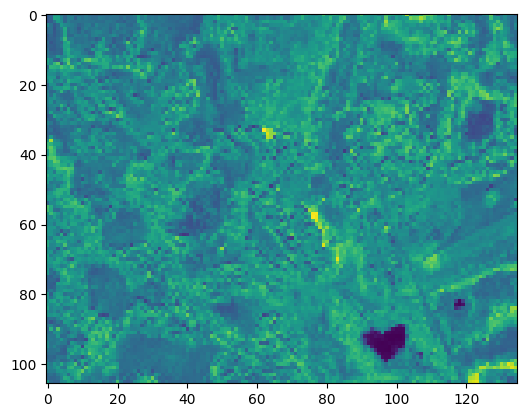

In [87]:
plt.imshow(to_draw[:,:,3]/255*4)